In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import * 
import pylab as plab
from pandas.plotting import scatter_matrix
import seaborn as sns
import folium
from branca.colormap import linear
import os
import json
%matplotlib inline


matplotlib.style.use('ggplot')
import csv as csv
#from itertools import groupby
pd.options.display.max_info_columns
pd.options.display.max_columns=100 
#np.set_printoptions(precision=4, suppress=True)


Question 1: Which product is the most complained about?

Question 2:  what is the most popular way of submitting complaints?

Question 3:  Is it possible to identify the top 10 company that the consumers have and least complain about? 

Question 4: what are the top 5 issues that consumers complained about?

Question 5: Is there any particular month or period of the year in which consumers’ complaints are not answer on 

QUESTION 6 :  how does the response to consumers’ complaint spread over the year  

Question 7: which states have the highest mortgage complaints?

Question 8: how many credit card complaints have been filled in California compared to the state of Montana?

The Consumer Complaint Database contains complaints we’ve received about consumer financial products and services, including:

Bank accounts or services
Consumer loans
Credit cards
Credit reporting
Debt collection
Money transfers
Mortgages
Prepaid cards
Payday loans
Student loans (private student loans and federal student loan servicing)
Virtual currency
Other consumer loan (such as pawn and title loans)
Other financial service (such as credit repair and debt settlement)



In [3]:
complaint_data=pd.read_csv('Consumer_Complaints.csv', sep=',',header='infer',parse_dates=True, dayfirst = True, engine="python")
complaint_data.values

array([['03-12-2014', 'Mortgage', 'Other mortgage', ..., 'No', 759217,
        nan],
       ['10-01-2016', 'Credit reporting', nan, ..., 'No', 2141773, nan],
       ['10/17/2016', 'Consumer Loan', 'Vehicle loan', ..., 'No',
        2163100, nan],
       ...,
       ['01-04-2017', 'Mortgage', 'Conventional fixed mortgage', ...,
        'No', 2274241, nan],
       ['09/28/2015', 'Debt collection', 'Non-federal student loan', ...,
        'No', 1582525, nan],
       ['08/19/2016', 'Debt collection', 'Payday loan', ..., 'Yes',
        2073214, nan]], dtype=object)

In [13]:
complaint_data=complaint_data.drop('Unnamed: 18',axis=1)

In [14]:
complaint_data.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217


In [15]:
df = complaint_data
df.head(200)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,01-03-2013,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,NATIONSTAR MORTGAGE,NC,28205,NaN,NaN,Web,01-07-2013,Closed with explanation,Yes,Yes,221633
196,01-07-2014,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,"CITIZENS FINANCIAL GROUP, INC.",MI,48363,NaN,NaN,Web,01-07-2014,Closed with explanation,Yes,Yes,658098
197,05/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,94539,NaN,NaN,Phone,05/30/2013,Closed with monetary relief,Yes,No,418678
198,10/31/2016,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,CA,91601,Older American,NaN,Phone,10/31/2016,Closed with explanation,Yes,No,2187992


In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
print("The shape is: ",df.shape)
print(df.dtypes)

The shape is:  (1025010, 18)
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer Complaint              object
Company Public Response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date Sent to Company            object
Company Response to Consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


In [18]:
df.columns = [  'Date received','Product','Sub_product','issue','sub-issue','consumer_complaint_explanation','Company_response','Company','State','Postal_code','Tags','Consumer_consent_provided','Complaint_Submission_type','Date_sent_to_company','Company_response_to_consumer','Timely_response_yes_no','Consumer disagrees','Complaint ID' ]              

In [19]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Tags                              object
Consumer_consent_provided         object
Complaint_Submission_type         object
Date_sent_to_company              object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
Complaint ID                       int64
dtype: object


In [20]:
df.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Date_sent_to_company,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773


In [21]:
df.to_csv('usconsumercomplaints.csv')

### new dataset 

In [29]:
complaint_data=pd.read_csv('usconsumercomplaints.csv', sep=',',header='infer',index_col=14,parse_dates=True, dayfirst = True, engine="python")
complaint_data.values

array([[0, '03-12-2014', 'Mortgage', ..., 'Yes', 'No', 759217],
       [1, '10-01-2016', 'Credit reporting', ..., 'Yes', 'No', 2141773],
       [2, '10/17/2016', 'Consumer Loan', ..., 'Yes', 'No', 2163100],
       ...,
       [1025007, '01-04-2017', 'Mortgage', ..., 'Yes', 'No', 2274241],
       [1025008, '09/28/2015', 'Debt collection', ..., 'Yes', 'No',
        1582525],
       [1025009, '08/19/2016', 'Debt collection', ..., 'Yes', 'Yes',
        2073214]], dtype=object)

In [30]:
df = complaint_data
df.head(1)

,Unnamed: 0,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
Date_sent_to_company,,,,,,,,,,,,,,,,,,
2014-03-17,0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,Closed with explanation,Yes,No,759217


In [31]:
variableToDrop = ['Tags', 'Unnamed: 0','Complaint ID']
df = df.drop(variableToDrop,1).dropna(subset=['Postal_code'])


In [32]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


In [36]:
# df.index= pd.to_datetime(dayfirst=True)
df.index = pd.to_datetime(df.index)

In [37]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


## Product 

In [38]:
df["Product"].describe()

count      1008292
unique          18
top       Mortgage
freq        250745
Name: Product, dtype: object

In [39]:
Product_tab = pd.crosstab(index=df.Product, columns="count_product")
Product_tab 

col_0,count_product
Product,
Bank account or service,84285
Checking or savings account,17825
Consumer Loan,31253
Credit card,88088
Credit card or prepaid card,22087
Credit reporting,139288
"Credit reporting, credit repair services, or other personal consumer reports",108733
Debt collection,193564
"Money transfer, virtual currency, or money service",4972


In [40]:
Product_tab.describe()

col_0,count_product
count,18.000000
mean,56016.222222
std,74229.561906
min,17.000000
25%,5011.500000
50%,19956.000000
75%,87137.250000
max,250745.000000


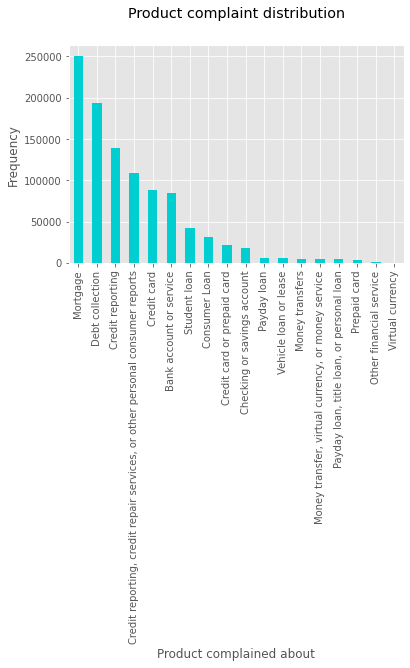

In [41]:
bar = df.Product.value_counts().plot(kind='bar', color=['darkturquoise'], label='Product')
plt.title('Product complaint distribution', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints.png', bbox_inches='tight')

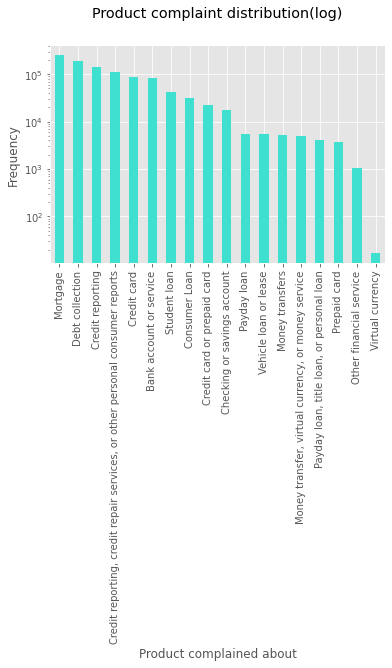

In [42]:
barlist = df.Product.value_counts().plot(kind='bar',logy=True, color=['turquoise'], label='Product')
plt.title('Product complaint distribution(log)', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints log.png', bbox_inches='tight')


In [43]:
df_mapping = df.loc[:,('State','Product')]

df_mapping["Mortgage"]= df_mapping.Product.str.contains("Mortgage")

df_mapping.Mortgage = df_mapping.Mortgage.astype(int)

df_mapping = df_mapping.loc[:,("State","Mortgage")]

df_mapping.head()

#df_mortagage = df.Product="Mortgage"
#df_mortagage


,State,Mortgage
Date_sent_to_company,,
2014-03-17,MI,1
2016-05-10,AL,0
2016-10-20,PA,0
2014-10-06,ID,0
2014-09-13,VA,0


In [44]:
df_mapping.describe()

,Mortgage
count,1.008292e+06
mean,2.486829e-01
std,4.322498e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [46]:
us_states = os.path.join('data', 'us-states.json')

geo_json_data = json.load(open(us_states))

In [50]:
from branca.colormap import linear

colormap = linear.OrRd_03.scale(
    df_mapping.Mortgage.value_counts().min(),
    df_mapping.Mortgage.value_counts().max())

print(colormap(5.0))


#fee8c8ff


In [51]:
mortgage_dict = df_mapping.set_index('State')['Mortgage']

mortgage_dict["AL"].head()

State
AL    0
AL    0
AL    0
AL    1
AL    1
Name: Mortgage, dtype: int64

## Subproduct complained about

In [53]:
Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab 



col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,3333
Auto,3711
Auto debt,1488
CD (Certificate of Deposit),512
Cashing a check without an account,610
...,...
Traveler’s/Cashier’s checks,87
VA mortgage,6279
Vehicle lease,2631


In [55]:
Subproduct_tab.describe()


col_0,count_Subproduct
count,75.000000
mean,10338.853333
std,20053.198772
min,12.000000
25%,420.500000
50%,2450.000000
75%,9641.000000
max,106485.000000


## complaints Submission_type

In [56]:
df["Complaint_Submission_type"].describe()

count     1008292
unique          6
top           Web
freq       729086
Name: Complaint_Submission_type, dtype: object

In [57]:
Submission_type_tab = pd.crosstab(index=df.Complaint_Submission_type, columns="Submission_type")
Submission_type_tab


col_0,Submission_type
Complaint_Submission_type,
Email,312
Fax,14650
Phone,58619
Postal mail,57950
Referral,147675
Web,729086


In [58]:
Submission_type_tab.describe()

col_0,Submission_type
count,6.000000
mean,168048.666667
std,279621.631608
min,312.000000
25%,25475.000000
50%,58284.500000
75%,125411.000000
max,729086.000000


In [59]:
df1 = df
df1.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees
Date_sent_to_company,,,,,,,,,,,,,,,
2014-03-17,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,Referral,Closed with explanation,Yes,No
2016-05-10,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,Consent provided,Web,Closed with explanation,Yes,No


In [60]:
df1["EmailSubmission"]= df.Complaint_Submission_type.str.contains("Email")
df1["FaxSubmission"]= df.Complaint_Submission_type.str.contains("Fax")
df1["PhoneSubmission"]= df.Complaint_Submission_type.str.contains("Phone")
df1["PostalSubmission"]= df.Complaint_Submission_type.str.contains("Postal mail")
df1["ReferralSubmission"]= df.Complaint_Submission_type.str.contains("Referral")
df1["WebSubmission"]= df.Complaint_Submission_type.str.contains("Web")


In [61]:
df1.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2014-03-17,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,Referral,Closed with explanation,Yes,No,False,False,False,False,True,False


In [62]:
submitted_via =df1.loc[:,["EmailSubmission","FaxSubmission", "PhoneSubmission","PostalSubmission","ReferralSubmission", "WebSubmission"]]


submitted_via.head()

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2014-03-17,False,False,False,False,True,False
2016-05-10,False,False,False,False,False,True
2016-10-20,False,False,False,False,False,True
2014-10-06,False,False,False,False,False,True
2014-09-13,False,False,False,False,False,True


In [63]:

submitted_via.EmailSubmission = submitted_via.EmailSubmission.astype(int)
submitted_via.FaxSubmission= submitted_via.FaxSubmission.astype(int)
submitted_via.PhoneSubmission= submitted_via.PhoneSubmission.astype(int)
submitted_via.PostalSubmission = submitted_via.PostalSubmission.astype(int)
submitted_via.ReferralSubmission= submitted_via.ReferralSubmission.astype(int)   
submitted_via.WebSubmission= submitted_via.WebSubmission.astype(int)

submitted_via.head(2)

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2014-03-17,0,0,0,0,1,0
2016-05-10,0,0,0,0,0,1


In [64]:
EmailSubmission_total=sum(submitted_via.EmailSubmission  ==True)
FaxSubmission_total=sum(submitted_via.FaxSubmission  ==True)
PhoneSubmission_total=sum(submitted_via.PhoneSubmission ==True)
PostalSubmission_total=sum(submitted_via.PostalSubmission ==True)
ReferralSubmission_total=sum(submitted_via.ReferralSubmission ==True)
WebSubmission_total=sum(submitted_via.WebSubmission == True)



In [65]:
submitted_via1 = {"EmailSubmission": EmailSubmission_total, "FaxSubmission": FaxSubmission_total, "PhoneSubmission": PhoneSubmission_total, 
        "PostalSubmission": PostalSubmission_total, "ReferralSubmission": ReferralSubmission_total, "WebSubmission": WebSubmission_total} 


In [66]:
submitted_via1 

{'EmailSubmission': 312,
 'FaxSubmission': 14650,
 'PhoneSubmission': 58619,
 'PostalSubmission': 57950,
 'ReferralSubmission': 147675,
 'WebSubmission': 729086}

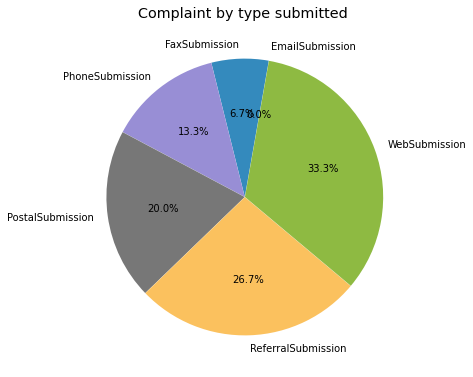

<Figure size 432x288 with 0 Axes>

In [67]:
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 0.8, 0.8])
labels = 'EmailSubmission','FaxSubmission','PhoneSubmission','PostalSubmission','ReferralSubmission','WebSubmission'
explode =(0.001, 0.001, 0.001, 0.001, 0.001, 0.001)
piechart =plt.pie(range(len(submitted_via1 )),explode=explode,labels=labels,autopct='%1.1f%%',startangle=80)
title('Complaint by type submitted ')
show(piechart)
#pdf.savefig()
savefig('Complaint by type submitted', bbox_inches='tight')

## sub product 

In [68]:
Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab 


col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,3333
Auto,3711
Auto debt,1488
CD (Certificate of Deposit),512
Cashing a check without an account,610
...,...
Traveler’s/Cashier’s checks,87
VA mortgage,6279
Vehicle lease,2631


In [69]:
df.Sub_product.describe()

count               775414
unique                  75
top       Credit reporting
freq                106485
Name: Sub_product, dtype: object

In [70]:

Sub_product_tab = pd.crosstab(index=df.Sub_product, columns="count_Consumer_disagreement")
Sub_product_tab


col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,3333
Auto,3711
Auto debt,1488
CD (Certificate of Deposit),512
Cashing a check without an account,610
...,...
Traveler’s/Cashier’s checks,87
VA mortgage,6279
Vehicle lease,2631


In [71]:
Sub_product_tab

col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,3333
Auto,3711
Auto debt,1488
CD (Certificate of Deposit),512
Cashing a check without an account,610
...,...
Traveler’s/Cashier’s checks,87
VA mortgage,6279
Vehicle lease,2631


## Company

In [72]:
df["Company"].describe()

count           1008292
unique             4759
top       EQUIFAX, INC.
freq              82894
Name: Company, dtype: object

In [73]:
Company_tab = pd.crosstab(index=df.Company, columns="count_company")
Company_tab 

col_0,count_company
Company,
"(Former)Shapiro, Swertfeger & Hasty, LLP",11
"1 STOP MONEY CENTERS, LLC",2
1ST 2ND MORTGAGE CO. OF NJ INC,2
"1ST ALLIANCE LENDING, LLC",20
"1ST FINANCIAL, INC.",1
...,...
iServe Trust,9
"loanDepot.com, LLC",573
reekside Recovery And Capital Management,24


In [74]:
Company_tab.describe()

col_0,count_company
count,4759.000000
mean,211.870561
std,2654.135252
min,1.000000
25%,2.000000
50%,6.000000
75%,28.000000
max,82894.000000


In [75]:
most_complained_company = df.Company.value_counts().max()
most_complained_company

82894

In [76]:
top_10_complaint_by_company =df.Company.value_counts().nlargest(10)
top_10_complaint_by_company

EQUIFAX, INC.                             82894
BANK OF AMERICA, NATIONAL ASSOCIATION     73024
Experian Information Solutions Inc.       71811
TRANSUNION INTERMEDIATE HOLDINGS, INC.    65289
WELLS FARGO & COMPANY                     61141
JPMORGAN CHASE & CO.                      50350
CITIBANK, N.A.                            41004
CAPITAL ONE FINANCIAL CORPORATION         26525
OCWEN LOAN SERVICING LLC                  26033
Navient Solutions, LLC.                   24048
Name: Company, dtype: int64

In [77]:
# mean 
means = df1.Company.value_counts().mean()

#standard deviation
errors = df1.Company.value_counts().std()


In [78]:
print (means)
print(errors)

211.87056104223578
2654.135251889538


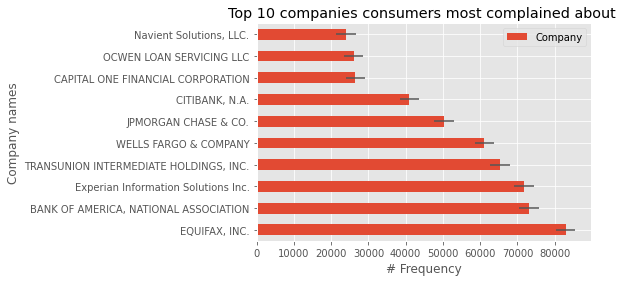

In [79]:


top_10_complaint_by_company.plot(kind='barh',xerr=errors)


plt.xlabel('# Frequency')
plt.ylabel('Company names')
plt.title('Top 10 companies consumers most complained about ')
plt.legend(loc='upper right')
plt.show()

In [80]:
_10_least_complaint =df.Company.value_counts().nsmallest(10)
_10_least_complaint

Northwest Title Company                      1
Miller Investment Group, Inc DBA AutoNow     1
Gillman Interests, Inc.                      1
Investment Evolution Corporation             1
Quality Title, Inc.                          1
Global Home Finance Inc                      1
Davis & Amaral Mortgage Consultants, Inc.    1
CAPITAL CENTER LLC                           1
Figliola & Romano, LLC                       1
Olson Associates PC                          1
Name: Company, dtype: int64

### get how many debt collection complaint the Bank of America received every day, month, year?

In [81]:
newDf = df.loc[:,('Product','Company')]
newDf.head(3)
#print("now that the df has been created, a selection must be apply so that Bank of American and debt collection values can be analysed")

,Product,Company
Date_sent_to_company,,
2014-03-17,Mortgage,M&T BANK CORPORATION
2016-05-10,Credit reporting,"TRANSUNION INTERMEDIATE HOLDINGS, INC."
2016-10-20,Consumer Loan,"CITIZENS FINANCIAL GROUP, INC."


In [82]:
newDf["Bank_of_America"] = newDf["Company"].str.contains("Bank of America")
newDf["debt_Collection"] = newDf["Product"].str.contains("Debt collection")
newDf.head(1)



,Product,Company,Bank_of_America,debt_Collection
Date_sent_to_company,,,,
2014-03-17,Mortgage,M&T BANK CORPORATION,False,False


In [83]:
variableToDrop = ['Product', 'Company']

newDf= newDf.drop(variableToDrop,1)


newDf.head(1)


,Bank_of_America,debt_Collection
Date_sent_to_company,,
2014-03-17,False,False


In [84]:
# discretise the values in both variable 
newDf.Bank_of_America = newDf.Bank_of_America.astype(int)    # discretise the values in both variable bank of america
newDf.debt_Collection = newDf.debt_Collection.astype(int)    # discretise the values in both variable debt collection

newDf.head()                                                # printout the data sample

,Bank_of_America,debt_Collection
Date_sent_to_company,,
2014-03-17,0,0
2016-05-10,0,0
2016-10-20,0,0
2014-10-06,0,0
2014-09-13,0,1


In [85]:
newDf['weekday'] = newDf.index.weekday

newDf.head(1)    

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2014-03-17,0,0,0


In [86]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
newDf['weekday'] = newDf['weekday'].map(lambda x: days[x])
newDf.head(1)

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2014-03-17,0,0,Monday


In [87]:

debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["debt_Collection"])

debt_table 


debt_Collection,0,1
weekday,,
Friday,131248,30458
Monday,129537,29899
Saturday,66279,16248
Sunday,66451,16951
Thursday,135447,32472
Tuesday,140997,34143
Wednesday,144769,33393


In [88]:
debt_table.describe()

debt_Collection,0,1
count,7.000000,7.000000
mean,116389.714286,27652.000000
std,34575.186559,7700.755634
min,66279.000000,16248.000000
25%,97994.000000,23425.000000
50%,131248.000000,30458.000000
75%,138222.000000,32932.500000
max,144769.000000,34143.000000


In [89]:

Americabank_debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["Bank_of_America"])

Americabank_debt_table

Bank_of_America,0
weekday,
Friday,161706
Monday,159436
Saturday,82527
Sunday,83402
Thursday,167919
Tuesday,175140
Wednesday,178162


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


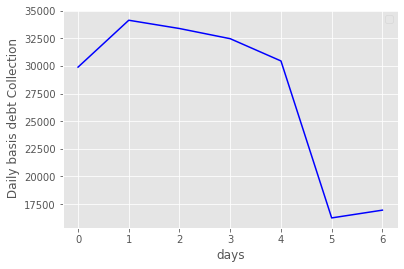

In [90]:
dailycollection = newDf["debt_Collection"].groupby(newDf.index.weekday).aggregate(np.sum)

plt.plot(dailycollection,color='blue' )
plt.xlabel('days')
plt.ylabel(' Daily basis debt Collection')
plt.legend(loc='upper right')
plt.show()



In [91]:

df = df.dropna(subset=["Timely_response_yes_no"])

## Timely_response

In [92]:
df["Timely_response_yes_no"].describe()

count     1008292
unique          2
top           Yes
freq       980962
Name: Timely_response_yes_no, dtype: object

In [93]:
Timely_response_tab = pd.crosstab(index=df.Timely_response_yes_no, columns="count_Timely_response")
Timely_response_tab

col_0,count_Timely_response
Timely_response_yes_no,
No,27330
Yes,980962


In [94]:
Timely_response_tab.describe()


col_0,count_Timely_response
count,2.000000
mean,504146.000000
std,674319.653956
min,27330.000000
25%,265738.000000
50%,504146.000000
75%,742554.000000
max,980962.000000


In [95]:
df1["YesTimelyresponse"]= df1.Timely_response_yes_no.str.contains("Yes")
df1["NoTimelyresponse"]= df1.Timely_response_yes_no.str.contains("No")

In [96]:

df1.YesTimelyresponse = df1.YesTimelyresponse.astype(int)
df1.NoTimelyresponse = df1.NoTimelyresponse.astype(int)

In [97]:
df_comp_resp=df1.loc[:,["YesTimelyresponse","NoTimelyresponse"]]


df_comp_resp.head(2)

,YesTimelyresponse,NoTimelyresponse
Date_sent_to_company,,
2014-03-17,1,0
2016-05-10,1,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


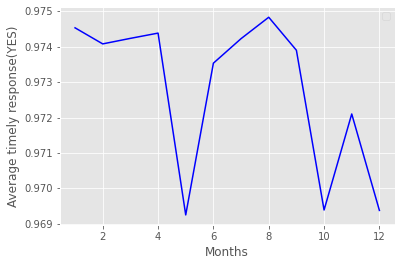

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


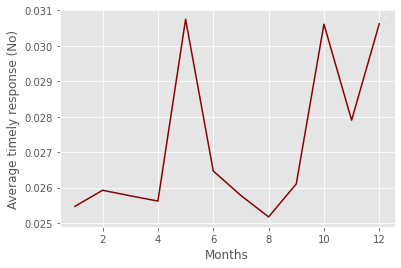

In [98]:


monthMeans = df_comp_resp["YesTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)

plt.plot(monthMeans,color='blue' )
plt.xlabel('Months')
plt.ylabel('Average timely response(YES)')
plt.legend(loc='upper right')
plt.show()


monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)
plt.plot(monthMeans1,color='darkred')
plt.xlabel('Months')
plt.ylabel('Average timely response (No)')
plt.legend(loc='upper right')
plt.show()


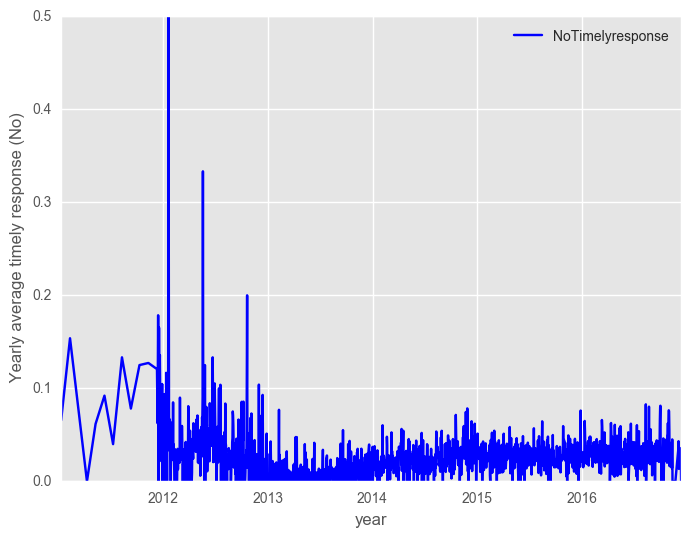

In [61]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]

 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size



monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index).aggregate(np.mean)
plt.plot(monthMeans1,color='blue')
plt.xlabel('year')
plt.ylabel(' Yearly average timely response (No)')
plt.legend(loc='upper right')
plt.show()
#savefig('Yearly average timely response.png')


In [99]:
df["issue"].describe()

count                                      1008292
unique                                         166
top       Loan modification,collection,foreclosure
freq                                        111093
Name: issue, dtype: object

## issue

In [100]:

Issue_tab = pd.crosstab(index=df.issue, columns="count_issue")
Issue_tab 

col_0,count_issue
issue,
APR or interest rate,5449
"Account opening, closing, or management",37018
Account terms and changes,479
Adding money,196
Advertising,35
...,...
Vehicle was repossessed or sold the vehicle,56
"Was approved for a loan, but didn't receive money",7
"Was approved for a loan, but didn't receive the money",36


In [101]:
Issue_tab.describe()

col_0,count_issue
count,166.000000
mean,6074.048193
std,15260.596179
min,1.000000
25%,214.500000
50%,1136.000000
75%,4273.500000
max,111093.000000


In [102]:
# get the top 5 issues people complianed about
top_5_complaint_issue =df1.issue.value_counts().nlargest(5)
top_5_complaint_issue

Loan modification,collection,foreclosure    111093
Incorrect information on credit report      101898
Loan servicing, payments, escrow account     76565
Cont'd attempts collect debt not owed        60145
Incorrect information on your report         59709
Name: issue, dtype: int64

In [103]:
top_5_complaint_issue.describe()

count         5.000000
mean      81882.000000
std       23697.744429
min       59709.000000
25%       60145.000000
50%       76565.000000
75%      101898.000000
max      111093.000000
Name: issue, dtype: float64

In [104]:
# mean 
means1 = df1.issue.value_counts().mean()

#standard deviation of issues
errors1 = df1.issue.value_counts().std()

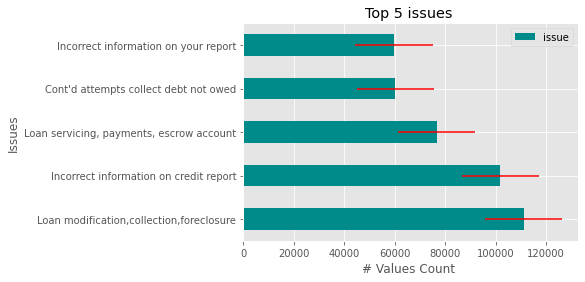

In [105]:
top_5_complaint_issue.plot(kind='barh',color='darkcyan',xerr=errors1,ecolor='r')


plt.xlabel('# Values Count ')
plt.ylabel('Issues')
plt.title('Top 5 issues ')
plt.legend(loc='upper right')
plt.show()

#### creating a series

In [106]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "CA" ))
                   
CA_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
CA_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-01-07,06/28/2013,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,"CITIBANK, N.A.",CA,92107,NaN,Web,Closed with monetary relief,Yes,No,False,False,False,False,False,True


In [107]:

CAcrdedit_card = CA_Creditcard.loc[:,("Product", "State") ]  


In [108]:
CAcrdedit_card.describe()

,Product,State
count,12315,12315
unique,1,1
top,Credit card,CA
freq,12315,12315


In [109]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "MT" ))
MT_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
MT_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-08-27,08/26/2013,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,JPMORGAN CHASE & CO.,MT,59828,NaN,Web,Closed with explanation,Yes,No,False,False,False,False,False,True


In [110]:

MTcrdedit_card = MT_Creditcard.loc[:,("Product", "State") ]  

In [111]:
MTcrdedit_card.describe()

,Product,State
count,183,183
unique,1,1
top,Credit card,MT
freq,183,183


In [112]:
company_filter = ((df["Product"] == "Credit card" ) & 
                   (df["Company"] == "Bank of America" ))
                   
Creditcard =df[company_filter].copy()
#european_stations["Country"].unique()
Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,


In [113]:
 BoACreditcard = Creditcard.loc[:,("Product", "Company") ]  